In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("../data/sensor_data.csv")
df.head()

,temperature,salinity,ph,input_pressure,water_level,target_output_pressure
0,19.363503,1220.004300,7.926095,1.258409,19.281148,1.098706
1,33.767858,5454.872879,6.252420,3.656773,91.229762,11.097647
2,28.299849,3200.491868,6.484886,3.703176,55.472714,6.060595
3,24.966462,4559.994838,8.695663,4.187150,84.381172,7.644233
4,13.900466,7352.965317,7.819287,4.630457,38.804464,12.875485


In [3]:
X = df.drop(columns=["target_output_pressure"])  # признаки
y = df["target_output_pressure"]                 # цель

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MSE: 0.1966711115081805
R² score: 0.9896749403084553


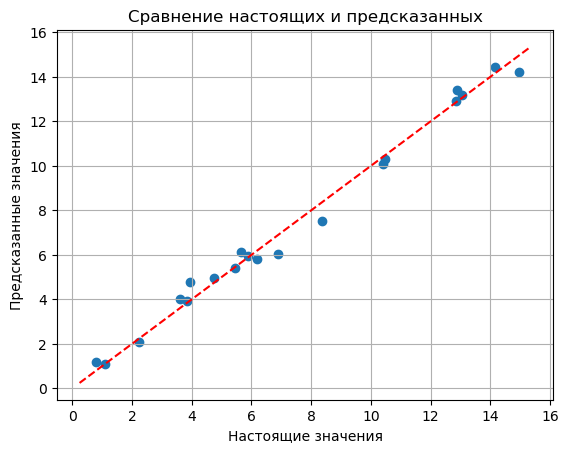

In [6]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² score:", r2_score(y_test, y_pred))

# Визуализация: настоящие vs предсказанные значения
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение настоящих и предсказанных")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # линия идеала
plt.grid(True)
plt.show()

In [7]:
import joblib

# Сохраняем модель в файл
joblib.dump(model, "../models/flow_predictor.pkl")
print("Модель сохранена в models/flow_predictor.pkl ✅")

Модель сохранена в models/flow_predictor.pkl ✅
